In [2]:
%cd ..

/home/bnrc2/mu/tf-posegan


In [3]:
import numpy as np
# import cv2

from tools.img_tf import *
import configparser
from hg_models.hg import *
from dataGenerator.datagen_v2 import DataGenerator

from tools.keypoint_eval import getScore
from tools.ht2coord import getjointcoord
from tools.keypoint_eval import load_annotations
def process_network(conf_file):
    params = {}
    config = configparser.ConfigParser()
    config.read(conf_file)
    for section in config.sections():

        for option in config.options(section):
            params[option] = eval(config.get(section, option))
    return params

network_params = process_network("./config/hourglass.cfg")


test = DataGenerator(imgdir="/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/",
                     nstack= 2,label_dir="/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_annotations_20170909.json",
                               out_record="/media/bnrc2/_backup/dataset/new_tf_mini/",num_txt="/media/bnrc2/_backup/dataset/new_tf_mini/new_train_mini.txt",
                               batch_size=8, name="train_mini", is_aug=False,isvalid=False)

train_img, train_mini, train_heatmap, train_center, train_scale, train_name = test.getData()
hg = hgmodel(nStack=network_params['nstack'],nModules=network_params['nmodules'])
out = hg.createModel(inputs=train_img,reuse=False).outputs
train_coord = reverseFromHt(out, nstack=network_params['nstack'], batch_size=8,
                                 num_joint=14,
                                 scale=train_scale, center=train_center, res=[64, 64])
test_coord = reverseFromHt(train_heatmap, nstack=network_params['nstack'], batch_size=8,
                                 num_joint=14,
                                 scale=train_scale, center=train_center, res=[64, 64])


/media/bnrc2/_backup/dataset/new_tf_mini/
record file exist!!
  [TL] InputLayer  input: (8, 256, 256, 3)
  [TL] Conv2dLayer hg_model/conv1: shape:[7, 7, 3, 64] strides:[1, 2, 2, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] BatchNormLayer hg_model/hg_model_Residual1/hg_model_Residual1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_model/hg_model_Residual1/hg_model_Residual1_convBlock/conv1: shape:[1, 1, 64, 64.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/hg_model_Residual1/hg_model_Residual1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_model/hg_model_Residual1/hg_model_Residual1_convBlock/conv2: shape:[3, 3, 64, 64.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/hg_model_Residual1/hg_model_Residual1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is

  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmpup_0/stage_0_hg_low2_3_tmpup_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmpup_0/stage_0_hg_low2_3_tmpup_0_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmpup_0/stage_0_hg_low2_3_tmpup_0_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmpup_0/stage_0_hg_low2_3_tmpup_0_add_layer: size:(8, 32, 32, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_

  [TL] ElementwiseLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmpup_1/stage_0_hg_low2_3_low2_2_tmpup_1_add_layer: size:(8, 16, 16, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow_1/stage_0_hg_low2_3_low2_2_tmplow_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow_1/stage_0_hg_low2_3_low2_2_tmplow_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow_1/stage_0_hg_low2_3_low2_2_tmplow_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow_1/stage_0_

  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow_1_add_layer: size:(8, 4, 4, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0_convBlock/b

  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low

  [TL] Conv2dLayer hg_stack/stage_0tmpres_1/stage_0tmpres_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0tmpres_1/stage_0tmpres_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0tmpres_1/stage_0tmpres_1_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0tmpres_1/stage_0tmpres_1_add_layer: size:(8, 64, 64, 256) fn:add
  [TL] Conv2dLayer hg_stack/stage_0_lin1/conv1: shape:[1, 1, 256, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_lin1/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_out: shape:[1, 1, 256, 14] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Conv2dLayer hg_stack/stage_0_conv1: shape:[1, 1, 256, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Conv2dLayer hg_stack/stage_0_con

  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_0/stage_1_hg_low2_3_tmplow_0_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_0/stage_1_hg_low2_3_tmplow_0_add_layer: size:(8, 16, 16, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmpup_1/stage_1_hg_low2_3_tmpup_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmpup_1/stage_1_hg_low2_3_tmpup_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmpup_1/stage_1_hg_low2_3_tmpup_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/sta

  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow_1/stage_1_hg_low2_3_low2_2_tmplow_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow_1/stage_1_hg_low2_3_low2_2_tmplow_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow_1/stage_1_hg_low2_3_low2_2_tmplow_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow_1/stage_1_hg_low2_3_low2_2_tmplow_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/sta

  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow2_0_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_lo

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow3_1/stage_1_hg_low2_3_low2_2_tmplow3_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow3_1/stage_1_hg_low2_3_low2_2_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow3_1/stage_1_hg_low2_3_low2_2_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_tmplow3_1/stage_1_hg_low2_3_low2_2_tmplow3_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/sta

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_1/stage_1_tmpres_1/stage_1_tmpres_1_add_layer: size:(8, 64, 64, 25

In [53]:

sess = tf.Session()
init = tf.group(tf.global_variables_initializer(),
                tf.local_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

sess.run(init)
saver = tf.train.Saver()
saver.restore(sess, "/media/bnrc2/_backup/models/minigan_no_gan/gan_67_784_0.0883")





INFO:tensorflow:Restoring parameters from /media/bnrc2/_backup/models/minigan_no_gan/gan_67_784_0.0883


In [ ]:
train_c,test_c ,name,center,scale= sess.run([train_coord,test_coord,train_name,train_center,train_scale])


coord.request_stop()
#
#     # Wait for threads to finish.
coord.join(threads)
sess.close()



In [54]:
train_c = np.squeeze(train_c)
test_c = np.squeeze(test_c)


In [55]:
print(train_c[0])
print(test_c[0])

[[ 166.12501526  198.875     ]
 [ 146.06251526  292.25      ]
 [ 166.12501526  354.5       ]
 [ 299.87503052  198.875     ]
 [ 313.25003052  302.625     ]
 [ 313.25003052  385.625     ]
 [ 192.87501526  385.625     ]
 [ 206.25001526  510.125     ]
 [ 212.93751526  645.        ]
 [ 276.46878052  385.625     ]
 [ 256.40628052  530.875     ]
 [ 236.34376526  645.        ]
 [ 249.71876526   74.37498474]
 [ 236.34376526  167.74998474]]
[[ 179.50001526  198.875     ]
 [ 149.40626526  302.625     ]
 [ 172.81251526  364.875     ]
 [ 299.87503052  209.25      ]
 [ 309.90628052  302.625     ]
 [ 313.25003052  396.        ]
 [ 206.25001526  396.        ]
 [ 202.90626526  510.125     ]
 [ 209.59376526  634.625     ]
 [ 276.46878052  396.        ]
 [ 256.40628052  520.5       ]
 [ 233.00001526  634.625     ]
 [ 253.06251526   74.37498474]
 [ 233.00001526  167.75      ]]


In [56]:
name[0]

b'2bb056cbb1d54077578519ff6e8ec063390280de'

In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plt

In [83]:
img_name = "/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/"+str(name[1].decode("utf-8"))+".jpg"

In [84]:
img_name

'/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/c46d0f0a7a0442b6859adb406b5701105a2c7dcc.jpg'

In [85]:
import scipy.misc as scm

In [86]:
img = scm.imread(img_name)
img2 = scm.imread(img_name)


/home/bnrc2/anaconda3/envs/tf14/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/home/bnrc2/anaconda3/envs/tf14/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


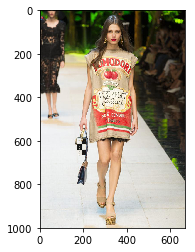

In [87]:
plt.imshow(img)

In [88]:
import cv2

In [89]:
for i in range(14):
    cv2.circle(img, (int(train_c[1][i][0]), int(train_c[1][i][1])), 10, (0, 255, 155), -1)

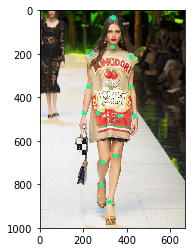

In [90]:
plt.imshow(img)

In [91]:
for i in range(14):
    cv2.circle(img2, (int(test_c[1][i][0]), int(test_c[1][i][1])), 10, (0, 255, 155), -1)

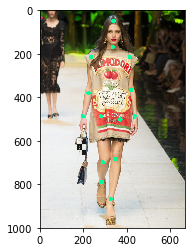

In [92]:
plt.imshow(img2)

In [93]:
import pandas as pd

In [94]:
js = pd.read_json("/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_annotations_20170909.json")

In [95]:
img_rol = js[js["image_id"] == str(name[1].decode("utf-8"))]

In [96]:
img_rol

,human_annotations,image_id,keypoint_annotations,url
8090,"{'human1': [174, 19, 457, 986], 'human2': [0, ...",c46d0f0a7a0442b6859adb406b5701105a2c7dcc,"{'human1': [240, 220, 1, 224, 388, 1, 200, 489...",http://lady.people.com.cn/NMediaFile/2016/0926...


In [97]:
img3 = scm.imread(img_name)


/home/bnrc2/anaconda3/envs/tf14/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


In [98]:
for key in img_rol["keypoint_annotations"].to_dict():
    dic = dict(img_rol["keypoint_annotations"].to_dict()[key])
    cod = np.reshape(dic["human1"],[-1,3])
    

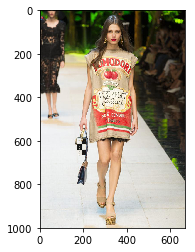

In [99]:
plt.imshow(img3)

In [100]:
for i in range(14):
    cv2.circle(img3, (int(cod[i][0]), int(cod[i][1])), 10, (0, 255, 155), -1)

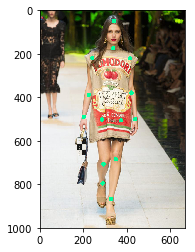

In [101]:
plt.imshow(img3)

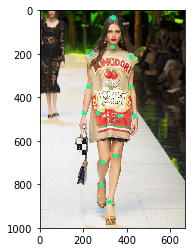

In [102]:
plt.imshow(img)

In [ ]:
center = se